In [ ]:
# Дискримінантний аналіз
# https://www.statology.org/linear-discriminant-analysis-in-python/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# Examplt 8.2 Rencher
path = 'c:/Users/vica/Dropbox/KAU-Stat2/multivariate_analysis/T8_1_STEEL.DAT'
Temp = np.loadtxt(path, dtype=float)
print(Temp)
Temp1 = Temp[:5,1:].T #  T1
Temp2 = Temp[5:,1:].T  # Table of temperatures  T2
# np.array(Temp1).T
# Temp['group'] = Temp[:,0]

[[ 1. 33. 60.]
 [ 1. 36. 61.]
 [ 1. 35. 64.]
 [ 1. 38. 63.]
 [ 1. 40. 65.]
 [ 2. 35. 57.]
 [ 2. 36. 59.]
 [ 2. 38. 59.]
 [ 2. 39. 61.]
 [ 2. 41. 63.]
 [ 2. 43. 65.]
 [ 2. 41. 59.]]


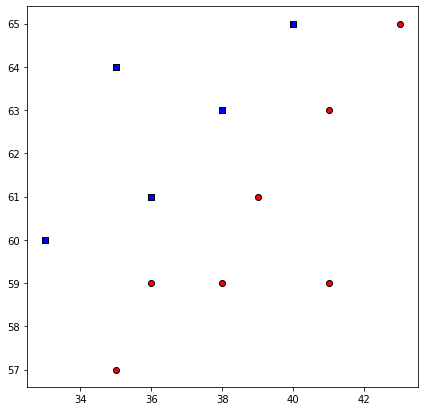

In [3]:
#Plot the data
fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(111)


# scatter малює лише точки 
# marker='s' малює  квадрати,'o' - коло
ax0.scatter(Temp1[0],Temp1[1],marker='s',c='blue',edgecolor='black')

# додаємо точки 
ax0.scatter(Temp2[0],Temp2[1],marker='o',c='red',edgecolor='black')  

plt.show()

In [4]:
# обчислюємо коваріаційні матриці
S1 = np.cov(Temp1)
S2 = np.cov(Temp2)
print(S1)
print(S2)

[[7.3 4.2]
 [4.2 4.3]]
[[8.33333333 6.66666667]
 [6.66666667 7.61904762]]


In [6]:
d1 = len(Temp1.T) # кількість елементів в T1
d2 = len(Temp2.T) # кількість елементів в   T2

print(d1,d2)

y1 = np.mean(Temp1, axis=1)
y2 = np.mean(Temp2, axis=1)

print(y1,y2)

5 7
[36.4 62.6] [39.         60.42857143]


In [7]:
Spl = ((d1-1)*S1+ (d2-1)*S2)/(d1+d2-2)   #  зважена коваріація

a = np.linalg.inv(Spl)@(y1-y2)  # дискримінантна функція
print(a)

[-1.63337671  1.81977879]


In [8]:
print(Temp1)
z1 = Temp1.T @ a
print(z1)

z2 = Temp2.T @ a

[[33. 36. 35. 38. 40.]
 [60. 61. 64. 63. 65.]]
[55.28529603 52.2049447  59.29765777 52.57774886 52.95055303]


In [12]:
# Розділимо  z  на 2 групи (z1 та z2) відповідно до того, чи більше ці значення
#  zmean або менші

zmean = 0.5*(np.mean(z1)+np.mean(z2)) # середнє значення

t = Temp[:,1:]@a
# print(t)  

In [13]:
# ділимо на 2 групи,  1  та   2
def group(x): 
    y=[]
    for i in range(len(x)):
        if (x[i] > zmean): 
            y = np.append(y,1)
        else: y = np.append(y,2)
    return y
print(group(t))

[1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.]


In [14]:
# Приклад  8.4.1 з Rencher
path = 'c:/Users/vica/Dropbox/KAU-Stat2/multivariate_analysis/T8_3_FOOTBALL.DAT'
Foot = np.loadtxt(path, dtype=float)
print(Foot[:10,])

[[ 1.   13.5  57.15 19.5  12.5  14.   11.  ]
 [ 1.   15.5  58.42 21.   12.   16.   12.  ]
 [ 1.   14.5  55.88 19.   10.   13.   12.  ]
 [ 1.   15.5  58.42 20.   13.5  15.   12.  ]
 [ 1.   14.5  58.42 20.   13.   15.5  12.  ]
 [ 1.   14.   60.96 21.   12.   14.   13.  ]
 [ 1.   15.   58.42 19.5  13.5  15.5  13.  ]
 [ 1.   15.   58.42 21.   13.   14.   13.  ]
 [ 1.   15.5  59.69 20.5  13.5  14.5  12.5 ]
 [ 1.   15.5  59.69 20.5  13.   15.   13.  ]]


In [15]:
X = Foot[:, 1:]  #  змінні 
y = Foot[:,0]    #  перша колонка, номери груп
# print(X)

In [16]:
np.sum(X[:10,], axis = 0)  # сумуємо по стовбчиках в Х

array([148.5 , 585.47, 202.  , 126.  , 146.5 , 123.5 ])

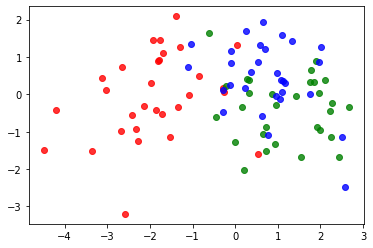

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()   #  задаємо модель 
model.fit(X,y)                         #  підгонка моделі

data_plot = model.fit(X, y).transform(X) # малюємо картинку, отриману після перетворення
target_names = y

plt.figure()
colors = ['red', 'green', 'blue']   # задаємо список кольорів 

for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
             label=target_name)

In [21]:
# що робить data_plot = model.fit(X, y).transform(X): перераховує дані в нових координатах

X_bar = np.mean(X,0)                   # взяли середнє по стовбчикам
X_centr =  X - X_bar                   # центрували 
b = np.array(model.scalings_ )         # власні вектори E^{-1}H, не нормовані

z =  np.dot(X_centr,b)                 # дискримінантна функція (те саме: data_plot) 
# print(data_plot)

In [22]:
dir(model)  # атрібути

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_max_components',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_solve_eigen',
 '_solve_lsqr',
 '_solve_svd',
 '_validate_data',
 'classes_',
 'coef_',
 'covariance_estimator',
 'decision_function',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_params',
 'intercept_',
 'means_',
 'n_components',
 'n_features_in_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'priors_',
 'scalings_',
 'score',
 'set_params',
 'shrinkage',
 'sol

In [26]:
np.set_printoptions(2)
print(model.priors_)     # Попередній розподіл: всі групи рівноцінні 
print(model.scalings_)   # Перші 2 власних вектори E^{-1}H, не нормовані
                         # перші 2- тому що у всіх інших власні числа комплексні
print(model.means_)      # Середні по колонкам V2 -- V7

[0.33 0.33 0.33]
[[ 9.48e-01  1.41e+00]
 [-3.64e-03 -5.13e-04]
 [-6.44e-03 -2.86e-02]
 [-6.47e-01  5.40e-01]
 [-5.04e-01 -3.84e-01]
 [-8.29e-01 -1.53e+00]]
[[15.2  58.94 20.11 13.08 14.73 12.27]
 [15.42 57.38 19.8  10.08 13.45 11.94]
 [15.58 57.77 19.81 10.95 13.7  11.8 ]]


In [190]:
# Матриці  E та  H
# 
p = 6   # розмірність 
n = 30  # кількість спостережень в групі
k = 3   # кількість груп
# Порахуємо суму  S1 = sum_{i=1}^k \sum_{j=1}^n y_{ij}y_{ij}'   n=30, k=3 len(y)= n*k = 90
S1 = np.zeros(shape=(6,6))
for i in range(len(y)): 
    S1+=(np.array(X[i,:]).reshape(6,1))@(np.array(X[i,:]).reshape(1,6))
print(S1)  

[[ 21383.84    80471.085   27603.355   15752.77    19354.57    16655.3   ]
 [ 80471.085  303376.0856 104064.454   59512.837   72975.866   62748.251 ]
 [ 27603.355  104064.454   35716.0925  20393.335   25031.625   21523.965 ]
 [ 15752.77    59512.837   20393.335   11885.51    14376.49    12306.24  ]
 [ 19354.57    72975.866   25031.625   14376.49    17623.63    15092.98  ]
 [ 16655.3     62748.251   21523.965   12306.24    15092.98    13005.66  ]]


In [198]:
# рахуємо суми всередині групи \sum_{i=1}^k y_{i \dot} y_{i \dot}'/n 

# 1. Середнє по групам і по стовбчикам, тобто y_{i \dot}
g = np.zeros(shape =(3,6))
for i in range(3):
    g[i,:]+= np.sum(X[i*30: (i+1)*30,:], axis = 0)
print(g)

[[ 456.   1768.11  603.25  392.5   442.    368.  ]
 [ 462.6  1721.39  594.1   302.4   403.6   358.3 ]
 [ 467.4  1733.1   594.3   328.4   410.9   354.1 ]]


In [196]:
# рахуємо скалярний добуток і сумуємо
B= np.zeros(shape=(6,6))
for i in range(3): 
    B+=  (np.array(g[i,:]).reshape((6,1)))  @ (np.array(g[i,:]).reshape((1,6)))
S2 = B/30
print(S2)

[[ 21346.584       80420.8038      27589.616       15745.48
   19343.734       16635.464     ]
 [ 80420.8038     303101.07047333 103975.71621667  59456.0517
   72946.28046667  62704.30756667]
 [ 27589.616      103975.71621667  35668.59541667  20386.65283333
   25020.43766667  21510.122     ]
 [ 15745.48        59456.0517      20386.65283333  11778.28566667
   14349.10666667  12302.54533333]
 [ 19343.734       72946.28046667  25020.43766667  14349.10666667
   17569.859       15092.18566667]
 [ 16635.464       62704.30756667  21510.122       12302.54533333
   15092.18566667  12972.99      ]]


In [197]:
E = S1-S2
print(E)

[[ 37.256       50.2812      13.739        7.29        10.836
   19.836     ]
 [ 50.2812     275.01512667  88.73778333  56.7853      29.58553333
   43.94343333]
 [ 13.739       88.73778333  47.49708333   6.68216667  11.18733333
   13.843     ]
 [  7.29        56.7853       6.68216667 107.22433333  27.38333333
    3.69466667]
 [ 10.836       29.58553333  11.18733333  27.38333333  53.771
    0.79433333]
 [ 19.836       43.94343333  13.843        3.69466667   0.79433333
   32.67      ]]


In [199]:
# тепер перейдемо до матриці Н
# рахуємо y_{dot dot}
y_2dot= np.sum(g,axis=0)
y_2dot

array([1386.  , 5222.6 , 1791.65, 1023.3 , 1256.5 , 1080.4 ])

In [200]:
# рахуємо скалярний добуток 
D = (np.array(y_2dot.reshape(6,1)))@(np.array(y_2dot.reshape(1,6)))
# і ділимо на k * n = 90
D/90   

array([[ 21344.4       ,  80428.04      ,  27591.41      ,
         15758.82      ,  19350.1       ,  16638.16      ],
       [ 80428.04      , 303061.67511111, 103967.45877778,
         59380.962     ,  72913.29888889,  62694.41155556],
       [ 27591.41      , 103967.45877778,  35666.77469444,
         20371.0605    ,  25013.42472222,  21507.76288889],
       [ 15758.82      ,  59380.962     ,  20371.0605    ,
         11634.921     ,  14286.405     ,  12284.148     ],
       [ 19350.1       ,  72913.29888889,  25013.42472222,
         14286.405     ,  17542.13611111,  15083.58444444],
       [ 16638.16      ,  62694.41155556,  21507.76288889,
         12284.148     ,  15083.58444444,  12969.60177778]])

In [204]:
#  тепео остаточно знаходимо Н: 
H= B/30- D/90
H

array([[  2.184     ,  -7.2362    ,  -1.794     , -13.34      ,
         -6.366     ,  -2.696     ],
       [ -7.2362    ,  39.39536222,   8.25743889,  75.0897    ,
         32.98157778,   9.89601111],
       [ -1.794     ,   8.25743889,   1.82072222,  15.59233333,
          7.01294444,   2.35911111],
       [-13.34      ,  75.0897    ,  15.59233333, 143.36466667,
         62.70166667,  18.39733333],
       [ -6.366     ,  32.98157778,   7.01294444,  62.70166667,
         27.72288889,   8.60122222],
       [ -2.696     ,   9.89601111,   2.35911111,  18.39733333,
          8.60122222,   3.38822222]])

In [17]:
# власні числа та власні вектори E^{-1}H
np.set_precision(2)
print(np.linalg.eig(np.linalg.inv(E)@ H))  # тут власні вектори вже нормовані!  В model.scalings_  не нормовані

AttributeError: module 'numpy' has no attribute 'set_precision'